In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io as skio
from scipy import ndimage, misc
from sklearn.cluster import KMeans
from PIL import Image, ImageDraw


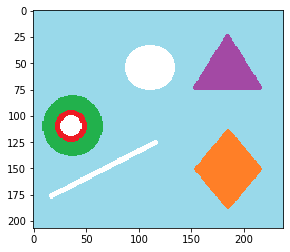

In [79]:
image = skio.imread('test2.png')
axis = plt.subplot()
axis.imshow(image)

CPU times: user 643 ms, sys: 412 ms, total: 1.05 s
Wall time: 559 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  after removing the cwd from sys.path.


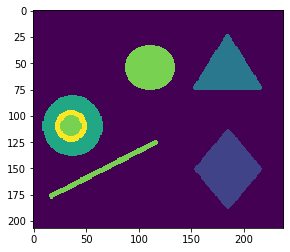

In [80]:
%%time
img_shape = tuple(image.shape)
x, y, z = img_shape
image = np.reshape(image, (x*y, z))
kmeans = KMeans(n_clusters=10).fit(image)
out = kmeans.predict(image).reshape((x, y))
plt.imshow(out)

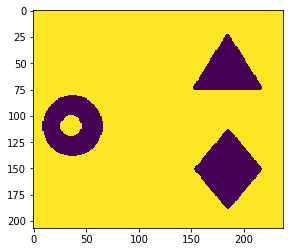

In [81]:
kmeans = KMeans(n_clusters=2).fit(image)
out = kmeans.predict(image).reshape((x, y))
plt.imshow(out)

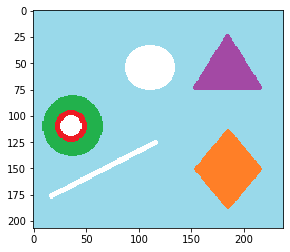

In [82]:
image = Image.open('test2.png')
pix = image.load()    
axis = plt.subplot()
axis.imshow(image);

CPU times: user 4.06 s, sys: 1.46 s, total: 5.51 s
Wall time: 3.79 s


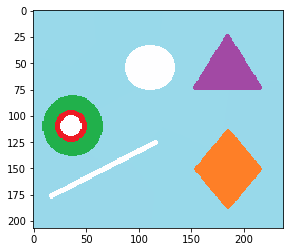

In [83]:
%%time
db = KMeans(n_clusters=20)
data = [(x, y, pix[x, y][0], pix[x, y][1], pix[x, y][2]) for x in range(image.size[0]) for y in range(image.size[1])]
db_clusters = db.fit_predict(data)

for p, c in zip(data, db_clusters):
    pix[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                        int(db.cluster_centers_[c, 3]), 
                        int(db.cluster_centers_[c, 4]))
      
axis = plt.subplot()
axis.imshow(image);

In [84]:
object_color = pix[180, 150]
object_color


(254, 127, 39)

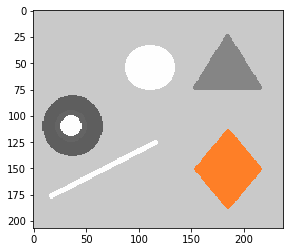

In [85]:
for x in range(image.size[0]):
  for y in range(image.size[1]):
    if pix[x,y] == object_color:
      pass
    else:
      avg = int((pix[x,y][0] + pix[x,y][1] + pix[x,y][2]) / 3)
      image.putpixel((x, y), (avg, avg, avg, 255))
axis = plt.subplot()
axis.imshow(image);

In [86]:
%%time
pix2 = np.array(image)
data2 = [(x, y, pix2[x, y][0], pix2[x, y][1], pix2[x, y][2]) for x in range(pix2.shape[0]) for y in range(pix2.shape[1])]

db_clusters = db.fit_predict(data2)

CPU times: user 3.75 s, sys: 1.49 s, total: 5.24 s
Wall time: 3.49 s


In [87]:
%%time
near = []
for i, c in enumerate(db.cluster_centers_):
    col1 = abs(c[2]-object_color[0])
    col2 = abs(c[3]-object_color[1])
    col3 = abs(c[4]-object_color[2])
    if col1 + col2 + col3 < 30:
        print(i, c)
        near.append(i)

3 [150.53501946 184.54241245 254.         127.          39.        ]
CPU times: user 1.15 ms, sys: 80 µs, total: 1.23 ms
Wall time: 1.67 ms


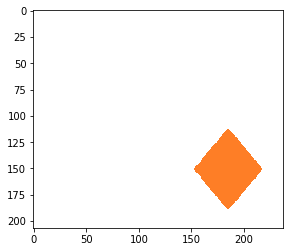

In [88]:
pix2 = np.zeros(pix2.shape, np.uint8)

for p, c in zip(data2, db_clusters):
    if c in near:
        pix2[p[0], p[1]] = (int(db.cluster_centers_[c, 2]), 
                              int(db.cluster_centers_[c, 3]), 
                              int(db.cluster_centers_[c, 4]))
    else:
        pix2[p[0], p[1]] = (255, 255, 255)

axis = plt.subplot()
axis.imshow(pix2);